# Lecture 11 notebook demo 1: GLM vs random forest

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error

import statsmodels.api as sm

In [7]:
covid_chicago = pd.read_csv('covid_chicago.csv', index_col=0)
covid_chicago.head(5)

,date,day,cases,deaths
0,2020-02-28,0,2,0.0
1,2020-02-29,1,3,0.0
2,2020-03-01,2,3,0.0
3,2020-03-02,3,4,0.0
4,2020-03-03,4,4,0.0


In [3]:
covid_chicago.shape

(25, 4)

Day is the number of days after Feb 28, 2020.

### Do train test split

In [8]:
train_filter = covid_chicago["day"] < 20
covid_chicago_train = covid_chicago[train_filter]
covid_chicago_test = covid_chicago[~train_filter]

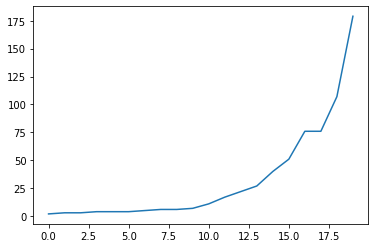

In [9]:
plt.plot(covid_chicago_train.cases)
plt.show()

### Fit negative binomial model

In [10]:
negbin_model = sm.GLM(
    covid_chicago_train.cases, sm.add_constant(covid_chicago_train.day),
    family=sm.families.NegativeBinomial()
)
negbin_results = negbin_model.fit()
print(negbin_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  cases   No. Observations:                   20
Model:                            GLM   Df Residuals:                       18
Model Family:        NegativeBinomial   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -73.881
Date:                Sat, 20 Feb 2021   Deviance:                       1.1812
Time:                        15:23:57   Pearson chi2:                     1.16
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4158      0.496      0.839      0.4

### Fit RF model

In [11]:
rf = RandomForestRegressor()
rf.fit(covid_chicago_train.day.to_frame(), covid_chicago_train.cases)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [12]:
mean_squared_log_error(covid_chicago_test.cases, 
                       rf.predict(covid_chicago_test.day.to_frame()))

1.9402720797755417

In [13]:
mean_squared_log_error(covid_chicago_test.cases, 
                       negbin_results.predict(sm.add_constant(covid_chicago_test.day)))

0.6240927676366328

### Plot model predictions

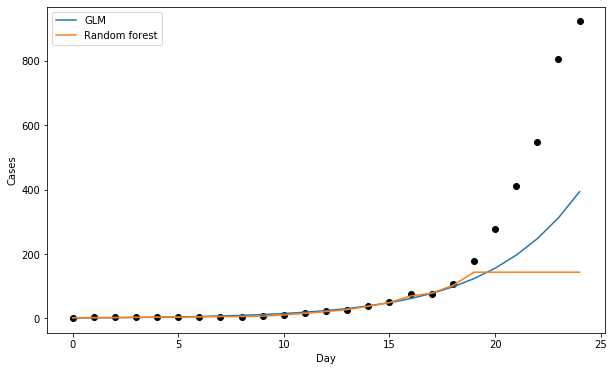

In [15]:
plt.figure(figsize = (10,6))
plt.scatter(covid_chicago["day"], covid_chicago["cases"], c = "k")
plt.plot(negbin_results.predict(sm.add_constant(covid_chicago.day)), label = "GLM")
plt.plot(rf.predict(covid_chicago.day.to_frame()), label = "Random forest")
plt.xlabel("Day")
plt.ylabel("Cases")
plt.legend()
plt.show()